In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
from matplotlib.colors import to_rgba
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/work/ccnr/glover.co/net_design/NetDesign')
import network_design as nd

In [2]:
homo_sapien_co_complex = pd.read_csv('../../data/protein_complex/HomoSapiens_cocomp_hq.txt',index_col=False,delimiter='\t')
homo_sapien_co_complex['pmid:method:quality:type'] = homo_sapien_co_complex['pmid:method:quality:type'].str.split('|')
homo_sapien_co_complex = homo_sapien_co_complex.explode('pmid:method:quality:type')

In [3]:
g = nx.Graph()

In [4]:
for i, row in homo_sapien_co_complex.iterrows():
    g.add_edge(row['Uniprot_A'],row['Uniprot_B'])

In [5]:
complexes = pd.unique(homo_sapien_co_complex['pmid:method:quality:type'])

In [6]:
# Order complexes by size
complex_sizes = [len(homo_sapien_co_complex[homo_sapien_co_complex['pmid:method:quality:type'] == c]) for c in complexes]

In [7]:
complexes = complexes[np.argsort(complex_sizes)]

### Complex 1

In [8]:
## Get complex
cur_complex = homo_sapien_co_complex[homo_sapien_co_complex['pmid:method:quality:type'] == complexes[17000]]

In [9]:
g_complex_0 = nx.Graph()
for i, row in cur_complex.iterrows():
    g_complex_0.add_edge(row['Uniprot_A'],row['Uniprot_B'])
g_complex_0 = nx.convert_node_labels_to_integers(g_complex_0)

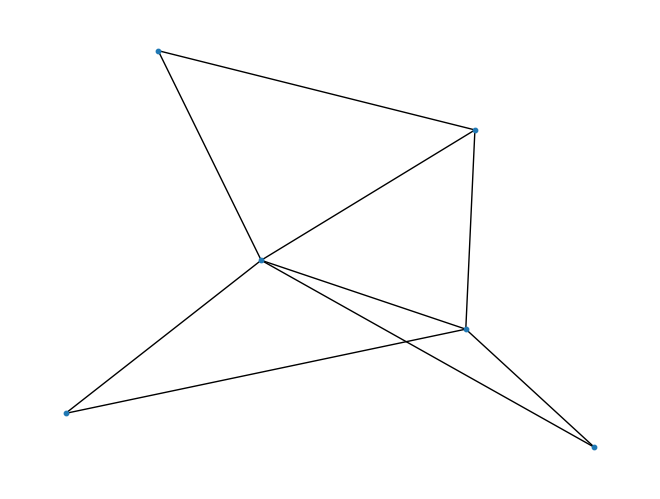

In [10]:
nx.draw(g_complex_0,node_size=10)

In [11]:
node_labels = np.unique(cur_complex['Uniprot_A'].tolist() + cur_complex['Uniprot_B'].tolist())

In [12]:
X = np.eye(len(node_labels),dtype=int)

In [13]:
O = nd.extract_O(g_complex_0,X)

In [14]:
new_X = np.tile(X,(20,1))

In [15]:
complex0 = nd.NetAssembly(new_X,O,new_X.sum(axis=0),system_energy=.2)

In [16]:
complex0.run(100000,link_strength=1,component=False)

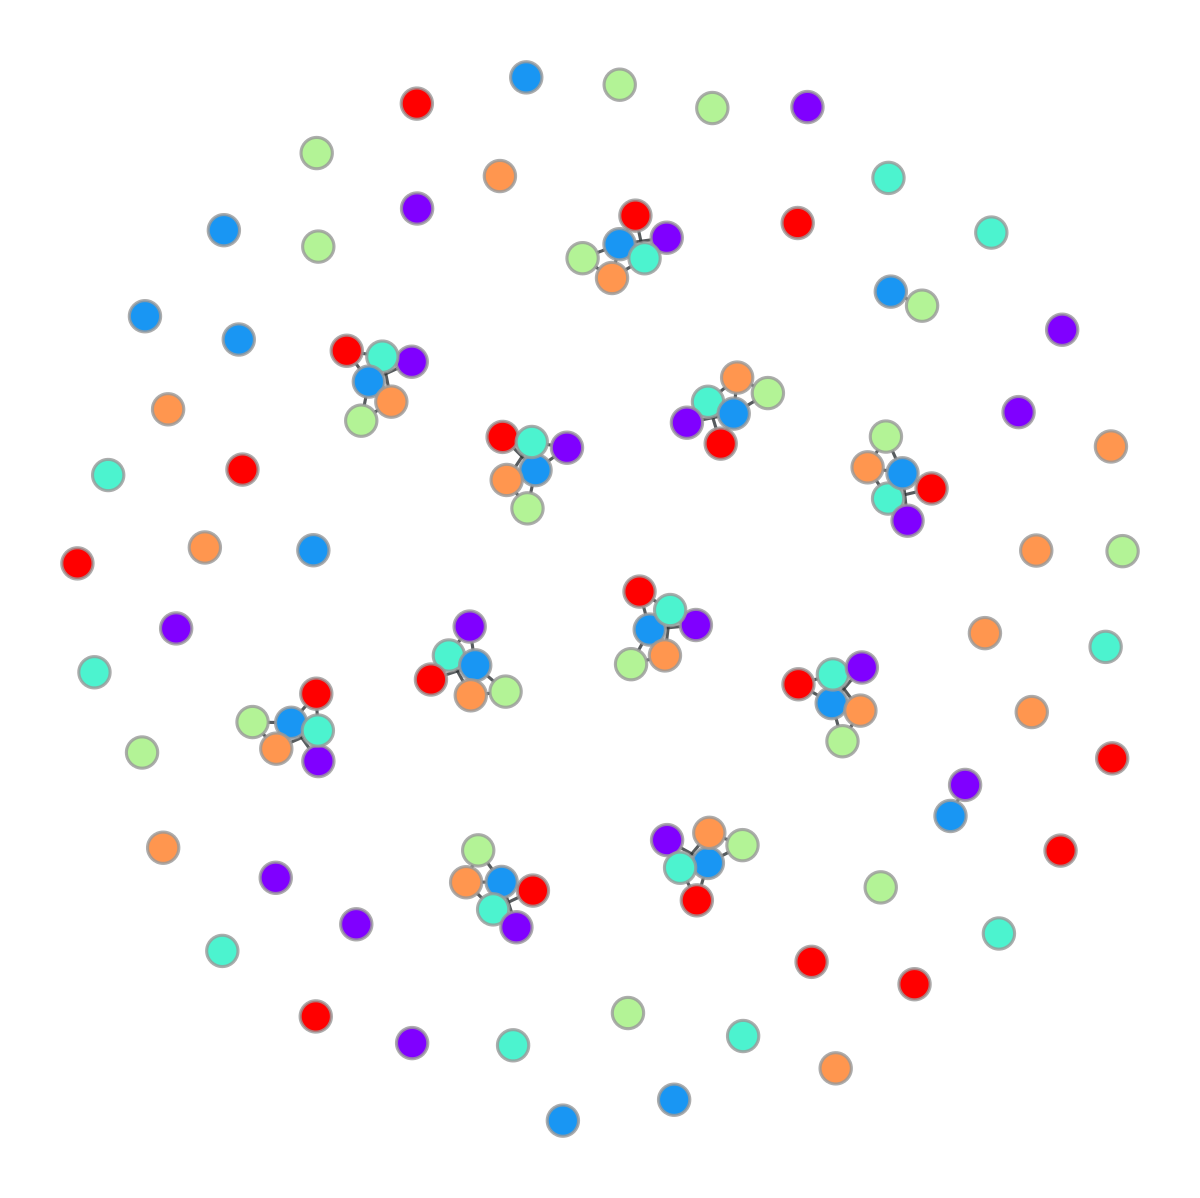

<Figure size 500x500 with 0 Axes>

In [17]:
complex0.draw(with_networkx=False)

In [18]:
h = nx.subgraph(complex0.g,sorted(list(nx.connected_components(complex0.g)),key=len,reverse=True)[2])

In [19]:
new_obj = nd.NetAssembly(new_X,O,new_X.sum(axis=0))

In [20]:
new_obj.g = h

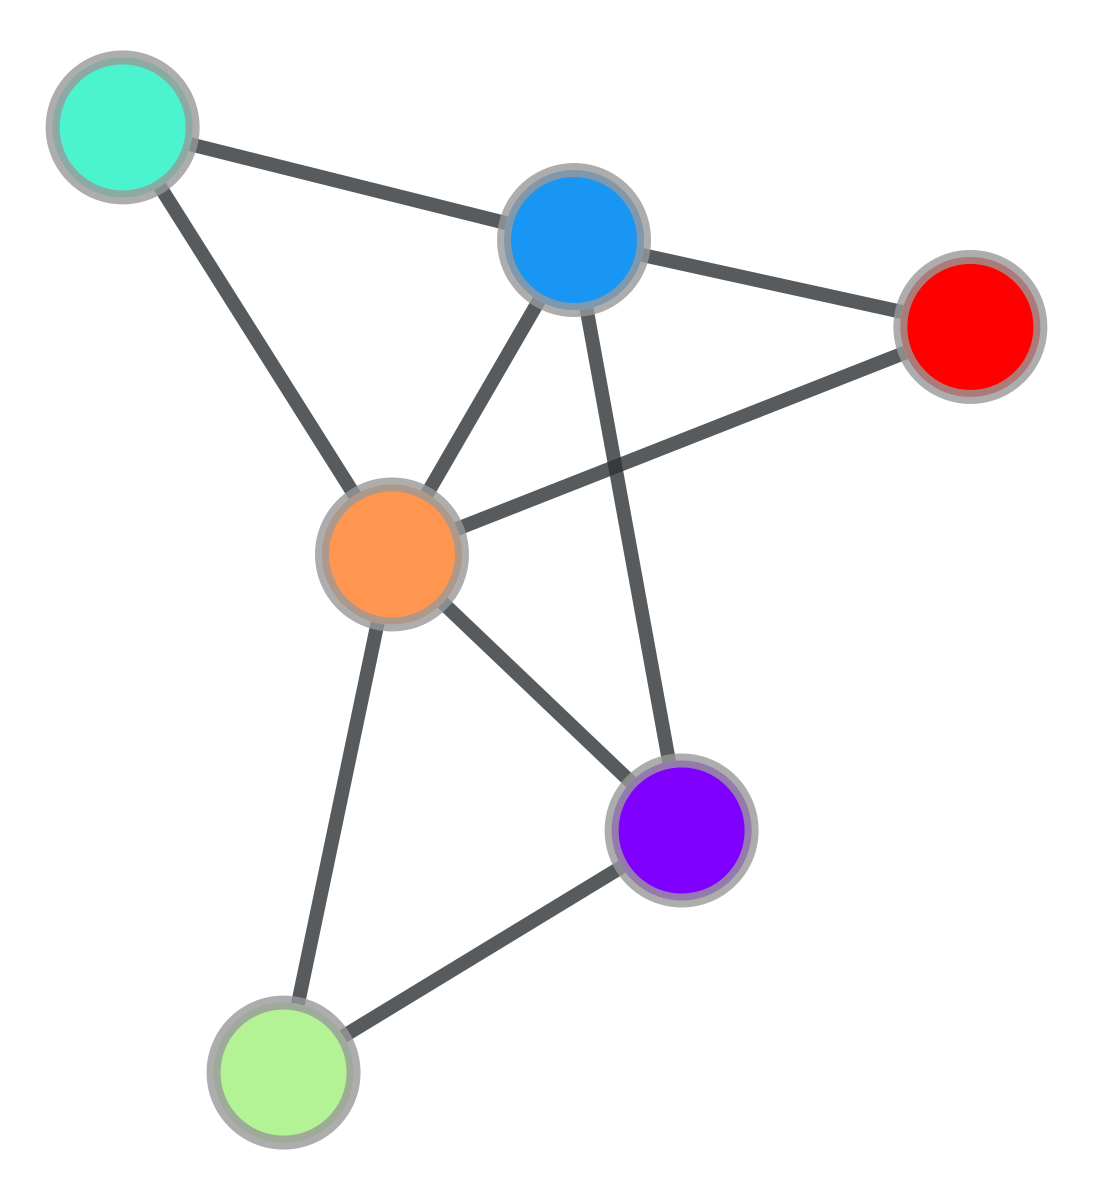

<Figure size 500x500 with 0 Axes>

In [21]:
new_obj.draw(with_networkx=False)

### Complex 2

In [38]:
cur_complex = homo_sapien_co_complex[homo_sapien_co_complex['pmid:method:quality:type'] == complexes[17008]]

In [39]:
g_complex_0 = nx.Graph()
for i, row in cur_complex.iterrows():
    g_complex_0.add_edge(row['Uniprot_A'],row['Uniprot_B'])
g_complex_0 = nx.convert_node_labels_to_integers(g_complex_0)

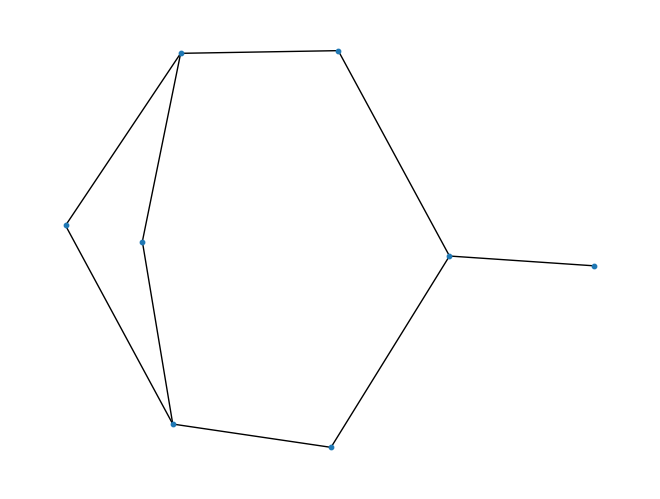

In [40]:
nx.draw(g_complex_0,node_size=10)

In [41]:
node_labels = np.unique(cur_complex['Uniprot_A'].tolist() + cur_complex['Uniprot_B'].tolist())

In [42]:
X = np.eye(len(node_labels),dtype=int)

In [43]:
O = nd.extract_O(g_complex_0,X)

In [44]:
new_X = np.tile(X,(20,1))

In [73]:
complex0 = nd.NetAssembly(new_X,O,new_X.sum(axis=0),system_energy=.4)

In [76]:
complex0.run(100000,link_strength=1,component=False)

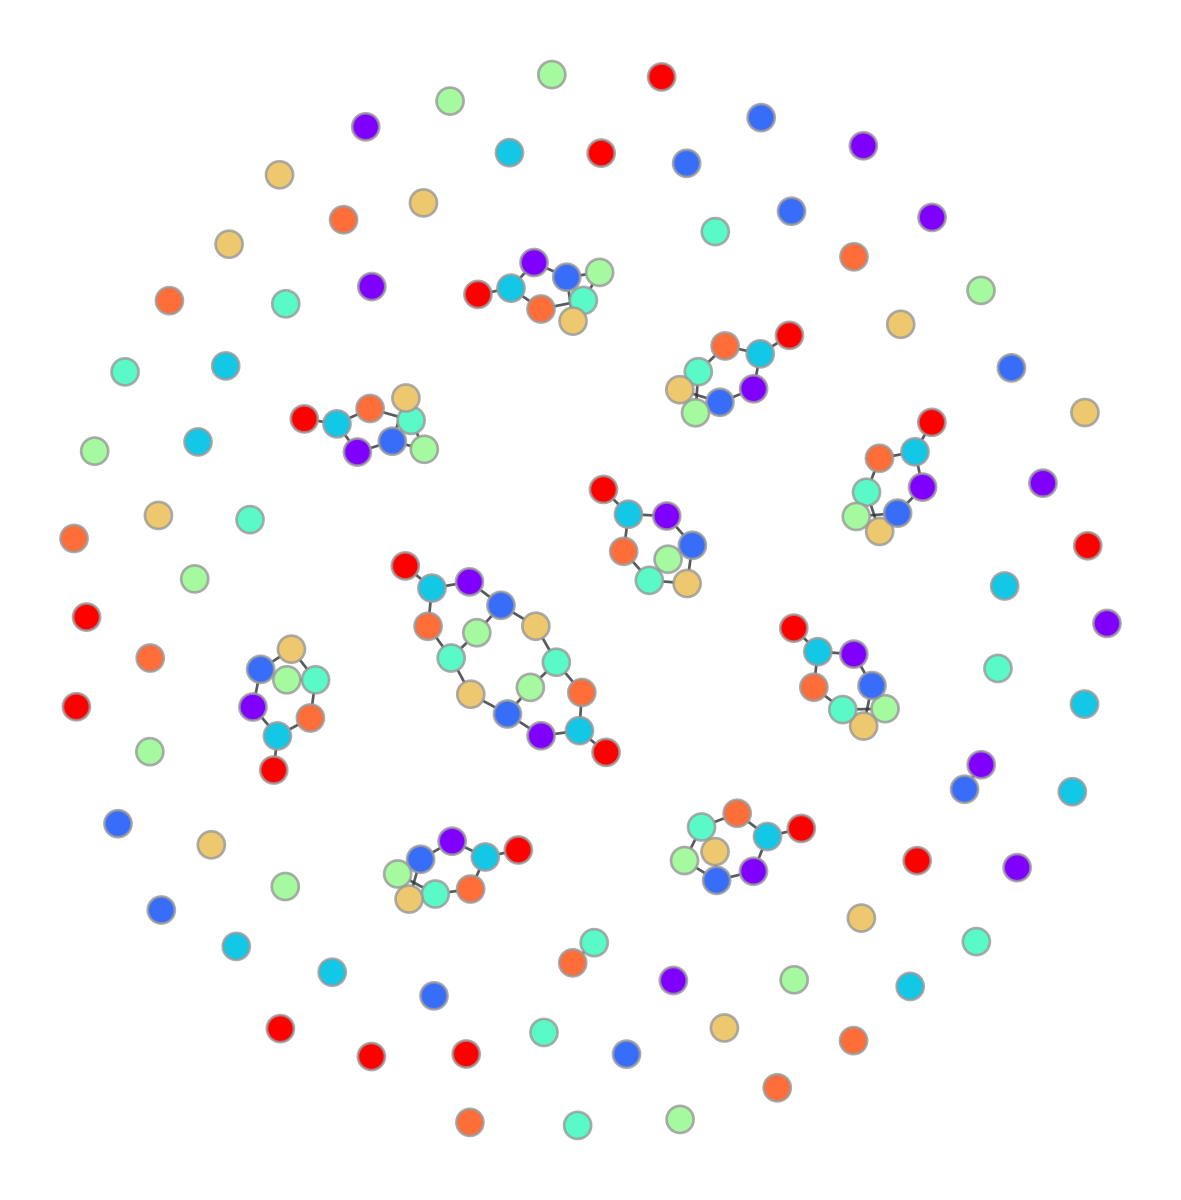

<Figure size 500x500 with 0 Axes>

In [77]:
complex0.draw(with_networkx=False)

In [48]:
h = nx.subgraph(complex0.g,sorted(list(nx.connected_components(complex0.g)),key=len,reverse=True)[2])

In [49]:
new_obj = nd.NetAssembly(new_X,O,new_X.sum(axis=0))

In [50]:
new_obj.g = h

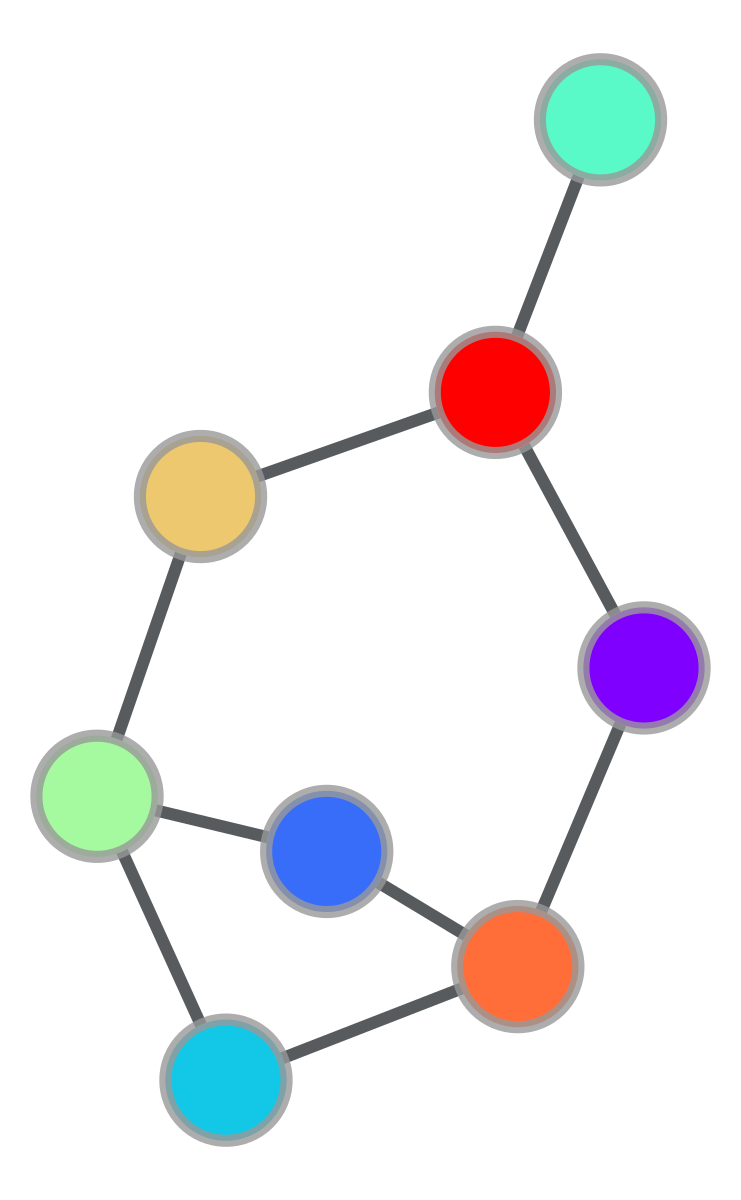

<Figure size 500x500 with 0 Axes>

In [51]:
new_obj.draw(with_networkx=False)

In [96]:
cur_complex = homo_sapien_co_complex[homo_sapien_co_complex['pmid:method:quality:type'] == complexes[17708]]

In [97]:
g_complex_0 = nx.Graph()
for i, row in cur_complex.iterrows():
    g_complex_0.add_edge(row['Uniprot_A'],row['Uniprot_B'])
g_complex_0 = nx.convert_node_labels_to_integers(g_complex_0)

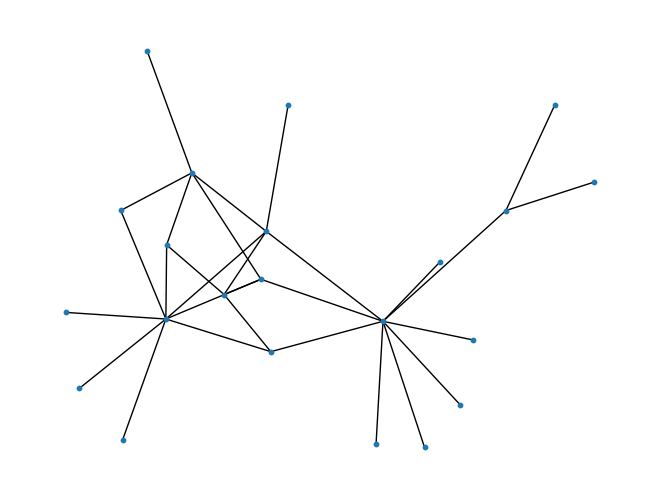

In [98]:
nx.draw(g_complex_0,node_size=10)

In [99]:
node_labels = np.unique(cur_complex['Uniprot_A'].tolist() + cur_complex['Uniprot_B'].tolist())

In [100]:
X = np.eye(len(node_labels),dtype=int)

In [101]:
O = nd.extract_O(g_complex_0,X)

In [102]:
new_X = np.tile(X,(10,1))

In [140]:
complex0 = nd.NetAssembly(new_X,O,new_X.sum(axis=0),system_energy=1)

In [141]:
complex0.run(100000,link_strength=.2,component=False)

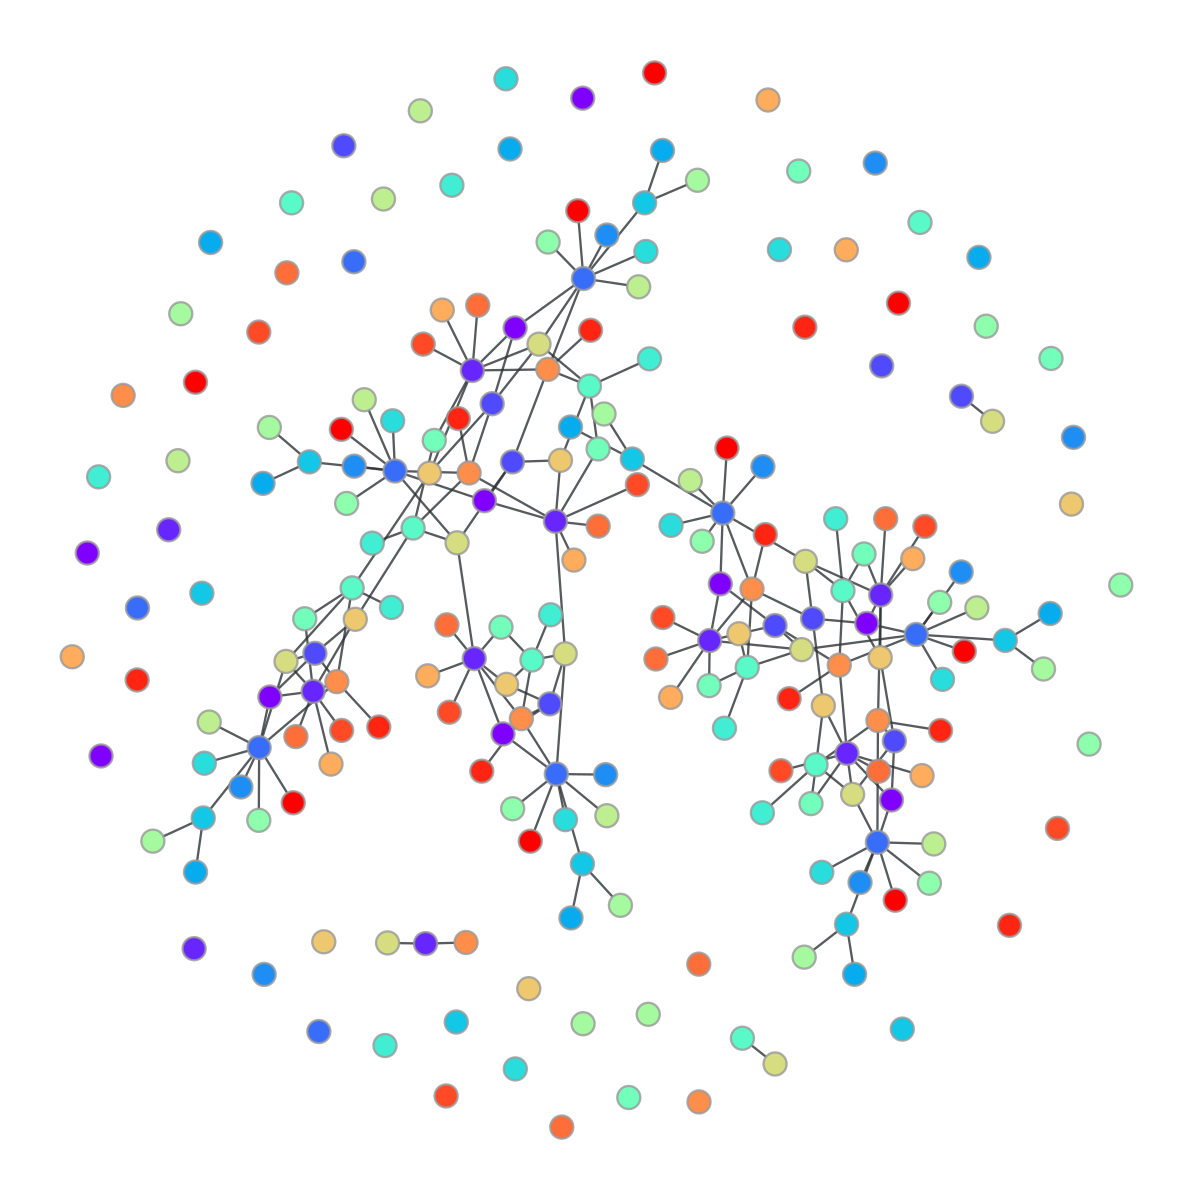

<Figure size 500x500 with 0 Axes>

In [139]:
complex0.draw(with_networkx=False)

In [107]:
h = nx.subgraph(complex0.g,sorted(list(nx.connected_components(complex0.g)),key=len,reverse=True)[2])

In [108]:
new_obj = nd.NetAssembly(new_X,O,new_X.sum(axis=0))

In [109]:
new_obj.g = h

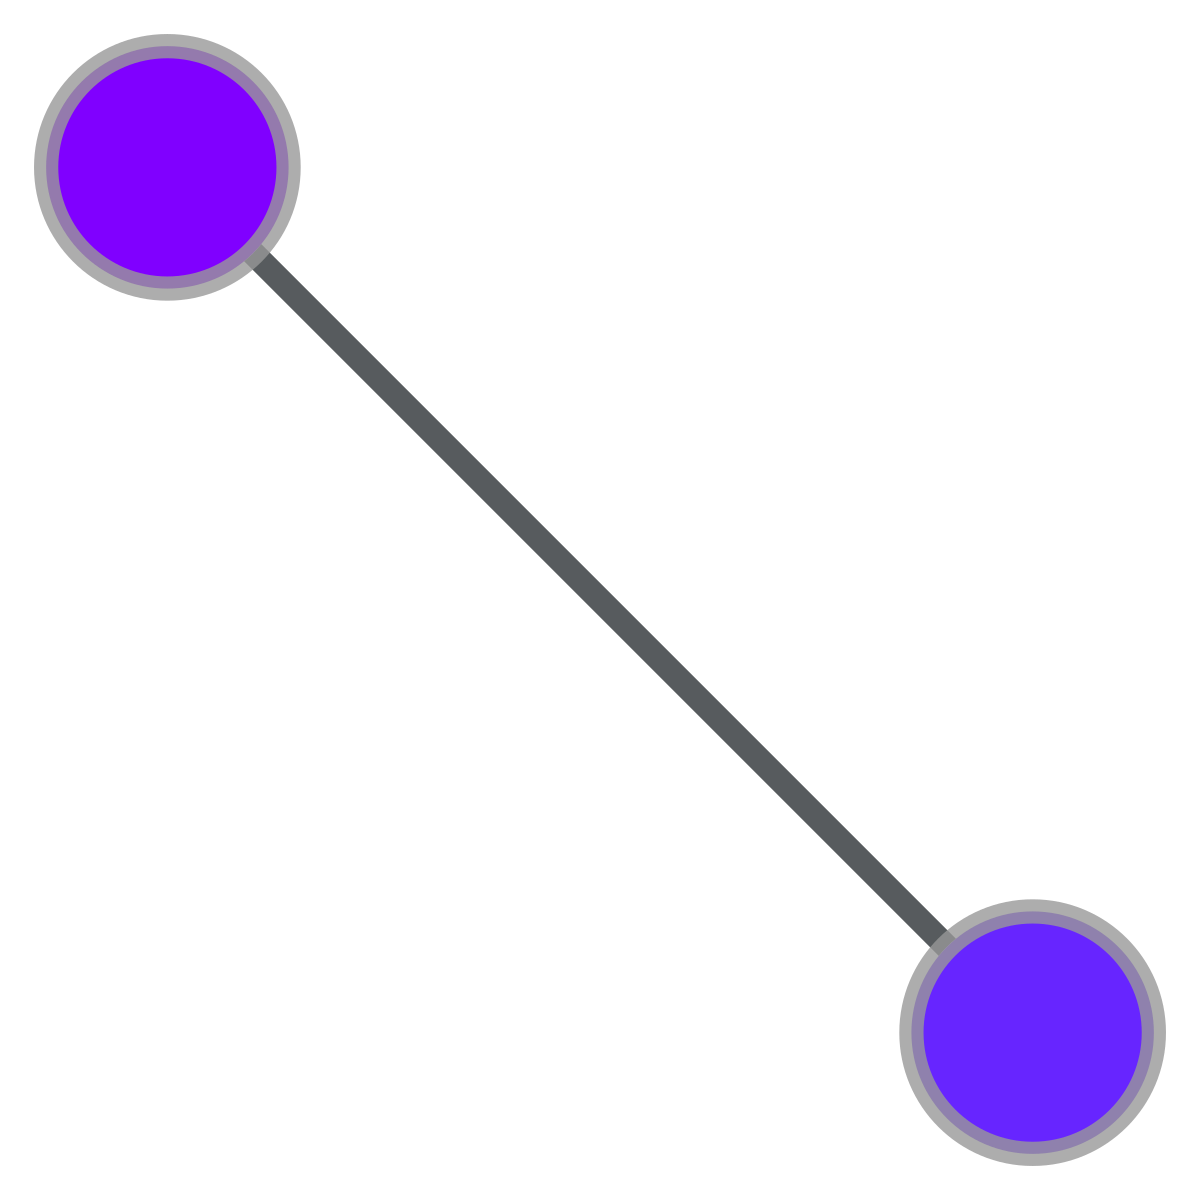

<Figure size 500x500 with 0 Axes>

In [110]:
new_obj.draw(with_networkx=False)